In [1]:
# Import required Libraries and read Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("D:/RAIT/2020-21/Sem-II/DWM/practicals/Experiments/expt3/Bank_Loan_Approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Data Preprocessing
# 1. Check size of dataset
df.shape

(614, 13)

In [3]:
# Check what are the features
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# 2. Select only required features
mdf=df.drop("Loan_ID",axis="columns")
mdf.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# 3. Check for Missing Values and impute
mdf.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# fill missing values
mdf['Gender'].fillna(("Male"), inplace=True)
mdf['Married'].fillna(("No"), inplace=True)
mdf['Dependents'].fillna((0), inplace=True)
mdf['Self_Employed'].fillna(("No"), inplace=True)
mdf['LoanAmount'].fillna((mdf['LoanAmount'].mean()), inplace=True)
mdf['Loan_Amount_Term'].fillna((mdf['Loan_Amount_Term'].median()), inplace=True)
mdf['Credit_History'].fillna((mdf['Credit_History'].median()), inplace=True)

In [11]:
mdf.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Check the data
mdf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
# 4. Machine Learning algorithms works better on numbers so convert input into numbers - Text to Numbers (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
le_married=LabelEncoder()
le_education=LabelEncoder()
le_self_employed=LabelEncoder()
le_property_area=LabelEncoder()
le_Loan_status=LabelEncoder()

In [14]:
mdf['gender_n'] = le_gender.fit_transform(mdf['Gender'])
mdf['married_n'] = le_married.fit_transform(mdf['Married'])
mdf['education_n'] = le_education.fit_transform(mdf['Education'])
mdf['self_employed_n'] = le_self_employed.fit_transform(mdf['Self_Employed'])
mdf['property_area_n'] = le_property_area.fit_transform(mdf['Property_Area'])
mdf['loan_status_n'] = le_Loan_status.fit_transform(mdf['Loan_Status'])
mdf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,gender_n,married_n,education_n,self_employed_n,property_area_n,loan_status_n
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,2,1


In [15]:
mdf.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,gender_n,married_n,education_n,self_employed_n,property_area_n,loan_status_n
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,2,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,1,1,0,1,2,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,1,1,1,0,2,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,1,1,0,0,1,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,1,1,0,0,2,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,1,1,0,0,1,0


In [16]:
# Now drop text features
nmdf=mdf.drop(["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"],axis=1)
nmdf

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_n,married_n,education_n,self_employed_n,property_area_n,loan_status_n
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,2,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,2,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,2,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,1
610,3+,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,1
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,2,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,2,1


In [17]:
nmdf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_n,married_n,education_n,self_employed_n,property_area_n,loan_status_n
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.817590,0.648208,0.218241,0.133550,1.037459,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.386497,0.477919,0.413389,0.340446,0.787482,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [18]:
nmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Dependents           614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
gender_n             614 non-null int32
married_n            614 non-null int32
education_n          614 non-null int32
self_employed_n      614 non-null int32
property_area_n      614 non-null int32
loan_status_n        614 non-null int32
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [19]:
nmdf.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [20]:
nmdf["Dependents"].replace({"3+": "3",0:"0"}, inplace=True)

In [21]:
nmdf.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [22]:
nmdf["Dependents"]=pd.to_numeric(nmdf.Dependents)

In [23]:
nmdf.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [24]:
nmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Dependents           614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
gender_n             614 non-null int32
married_n            614 non-null int32
education_n          614 non-null int32
self_employed_n      614 non-null int32
property_area_n      614 non-null int32
loan_status_n        614 non-null int32
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [25]:
nmdf.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_n,married_n,education_n,self_employed_n,property_area_n,loan_status_n
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,2,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,2,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,2,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,2,1


In [26]:
# 6. Now Divide input and output
x=nmdf.drop("loan_status_n",axis="columns")
y=nmdf['loan_status_n']

In [27]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_n,married_n,education_n,self_employed_n,property_area_n
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,2
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,2
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,2
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,2
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,2


In [28]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status_n, Length: 614, dtype: int32

In [29]:
# divide the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [30]:
# Check the size of data after split
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 11)
(429, 11)
(185, 11)
(429,)
(185,)


In [34]:
# Build Decision Tree Classifier
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [35]:
# Train the model
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# Check Model Score
model.score(x_test,y_test)

0.7297297297297297

In [37]:
# Calculating y Prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0])

In [38]:
# Measure Accuarcy
from sklearn.metrics import confusion_matrix, average_precision_score
from sklearn.metrics import precision_recall_fscore_support
cm=confusion_matrix(y_pred,y_test)
aps=average_precision_score(y_pred,y_test)
print(precision_recall_fscore_support(y_pred,y_test, average='macro'))
print("--------")
print("Confusion Matrix is -")
print(cm)
print("--- Average Precision Score is ----")
print(aps)

(0.7106427270361697, 0.7022738630684657, 0.705564043799338, None)
--------
Confusion Matrix is -
[[41 28]
 [22 94]]
--- Average Precision Score is ----
0.7432829664033733


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

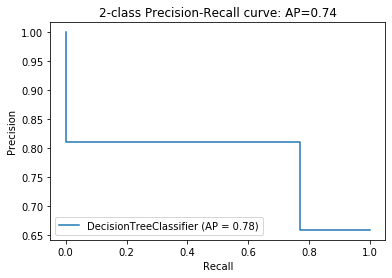

In [39]:
# Plotting Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(aps))

In [47]:
print(model.predict([[2,250000,20000,1500,120,1,1,0,0,1,0]]))
print(model.predict([[1,1500,0,150,360,1,1,0,0,1,2]]))

[1]
[0]


In [40]:
x_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'gender_n', 'married_n',
       'education_n', 'self_employed_n', 'property_area_n'],
      dtype='object')